# Intro

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

In [2]:
import vice

import surp
from surp import subgiants
from surp import gce_math as gcem

import arya
arya.style.set_size((10/3, 10/3))
from arya import COLORS

/users/PAS2232/aeyobd/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [4]:
def find_model(name):
    """
    Finds the pickled model with either the given name or the parameters 
    and returns the csv summary
    """
    
    file_name = "../models/" + name + "/stars.csv"
    model =  pd.read_csv(file_name, index_col=0)
    return model

In [5]:
data_kwargs = dict(
    color="k", 
    stat="median",
    err_kwargs=dict(facecolor="k", alpha=0.3)
)

model_kwargs = dict(
    stat="median", errorbar=None,
    aes="line"
)


def zooh_models(models, labels,x="MG_H", y="C_MG", sequential=False, filt_ha=True, **kwargs):
    kwargs = dict(numbins=20, **kwargs)
    
    N = len(models)
    
    if sequential:
        hm = arya.HueMap(clim=(0, N))
    else:
        hm = lambda i: COLORS[i]
    # end
        
    for i in range(N):
        name = labels[i]
        model = models[i]
        if filt_ha:
            df = surp.plots.filter_high_alpha(model)
        else:
            df = model
        color = hm(i)
            
        arya.medianplot(df, x=x + "_true", y=y+ "_true", label=name, color=color, **model_kwargs, **kwargs)
    # end

    if filt_ha:
        df = surp.plots.filter_high_alpha(subgiants)
    else:
        df = subgiants
        
    arya.medianplot(df, x=x, y=y, zorder=-2, **data_kwargs, **kwargs)
    
# end


    
def zofeo_models(models, labels, x="MG_FE", y="C_MG", sequential=False, mg_0=-0.0, w=0.025, **kwargs):
    kwargs = dict(numbins=12, x=x, y=y, **kwargs)
    df = surp.plots.filter_metallicity(subgiants, c=mg_0, w=w)

    arya.medianplot(df, **data_kwargs, **kwargs)
    
    N = len(models)
    kwargs["x"] = x + "_true"
    kwargs["y"] = y+ "_true"

    if sequential:
        hm = arya.HueMap(clim=(0, N))
    else:
        hm = lambda i: COLORS[i]
    # end    
    
    for i in range(N):
        model = models[i]
        df = surp.plots.filter_metallicity(model, c=mg_0, w=w)
        color = hm(i)

        arya.medianplot(df, label=labels[i], color=color, **model_kwargs, **kwargs)
    #end 
    

#

In [6]:
def names_to_models(names):
    return [find_model(name) for name in names]

In [7]:
def compare_cooh(names, labels, ylim=None, legend=True, **kwargs):
    models = names_to_models(names)
    zooh_models(models, labels,legend=legend, **kwargs)
    if legend:
        arya.Legend(color_only=True)
    plt.xlabel("[Mg/H]")
    plt.ylabel("[C/Mg]")
    
    if ylim is not None:
        plt.ylim(ylim)
    else:
        plt.ylim(-0.24, 0.04)
        plt.yticks(np.arange(-0.2, 0.02, 0.05))
    # end if
    
    plt.xlim(-0.45, 0.35)

In [8]:
def compare_coofe(names, labels, legend=True, ylim=None, **kwargs):
    models = names_to_models(names)
    zofeo_models(models, labels, legend=legend, **kwargs)
    if legend:
        arya.Legend(color_only=True)
    plt.xlabel("[Mg/Fe]")
    plt.ylabel("[C/Mg]")
    plt.xlim(0, 0.3)


In [9]:
def compare(names, labels, axs=None, **kwargs):
    if axs is None:
        fig, axs = plt.subplots(1, 2, figsize=(7, 3), sharex="col", sharey=True,  gridspec_kw={"wspace": 0, "hspace": 0})
    # end
        
    plt.sca(axs[0])
    compare_cooh(names, labels, **kwargs, legend=False)
    
    plt.sca(axs[1])
    compare_coofe(names, labels, legend=False, **kwargs)
    plt.ylabel("")
    arya.Legend(color_only=True)

# end


# Main figures

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(7, 5), sharex="col", sharey=True, gridspec_kw={"wspace": 0, "hspace": 0})


names = [
    "zeta_0.5",
    "C11_f0.2",
    "zeta_1.5",
]
labels = [
    r"$1/2 \zeta^{\rm cc}$", 
    r"$\zeta^{\rm cc}$", 
    r"$3/2 \zeta^{\rm cc}$"
]

compare(names, labels, axs = axs[0], sequential=True)




names = [    
    "C11_alpha_agb1.0",
    "C11_alpha_agb2.0",
    "C11_alpha_agb3.0",
  ]

labels = [r"$1\times{\rm AGB}$", r"$2\times{\rm AGB}$", r"$3\times{\rm AGB}$",]
compare(names, labels, sequential=True, axs=axs[1])

plt.ylim(-0.25)

plt.savefig("figures/sims_zeta_f.pdf")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


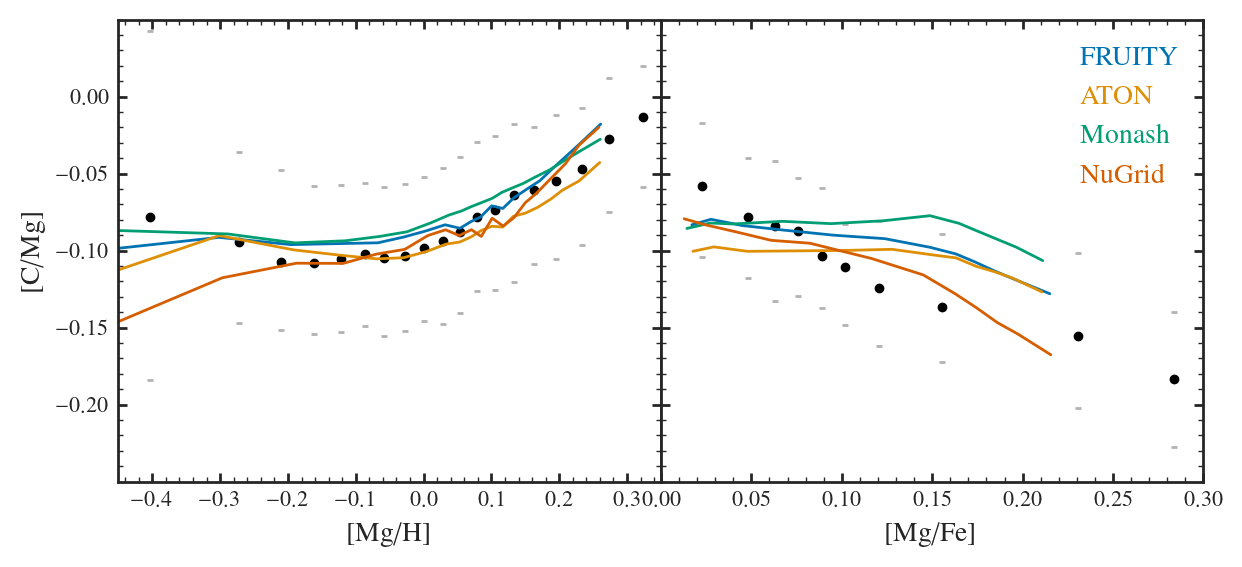

In [12]:
names = [    
    "C11_oob",
    "V13_oob",
    "K16_oob",
    "P16_oob",
    #"C11_f0.0"
  ]

labels = ["FRUITY", "ATON", "Monash",  "NuGrid", "CC only"]

compare(names, labels)
plt.ylim(-0.25, 0.05)
plt.savefig("figures/sims_agb.pdf")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


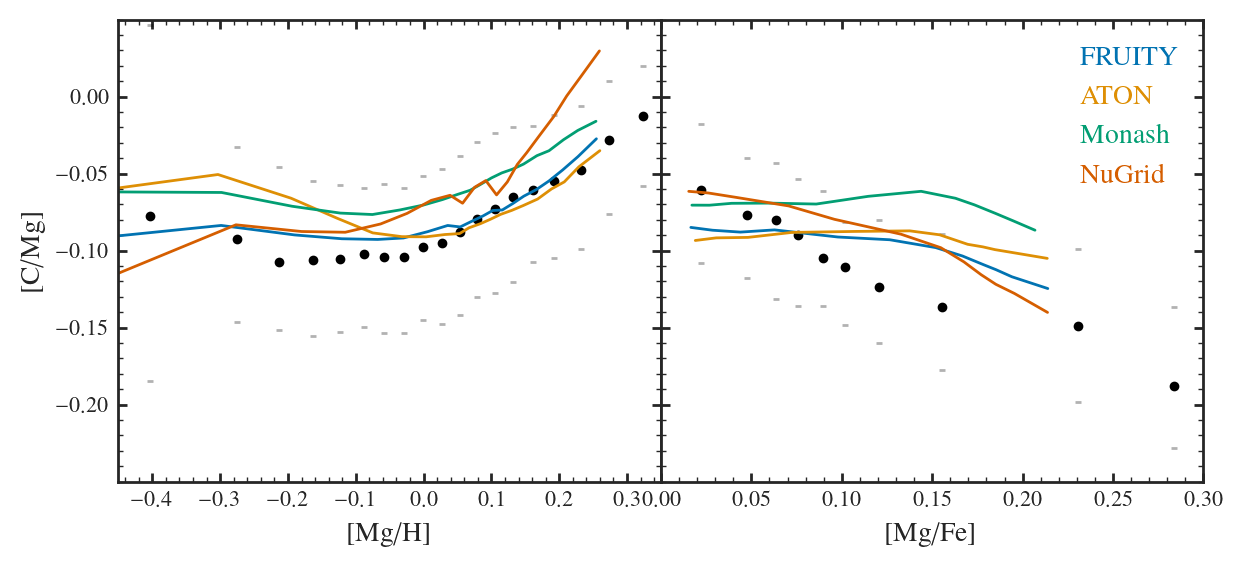

In [12]:
names = [    
    "C11_alpha_agb1.0",
    "V13_alpha_agb1.0",
    "K16_alpha_agb1.0",
    "P16_alpha_agb1.0",
    #"C11_f0.0"
  ]

labels = ["FRUITY", "ATON", "Monash",  "NuGrid", "CC only"]

compare(names, labels)
plt.ylim(-0.25, 0.05)
plt.savefig("figures/sims_agb.pdf")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


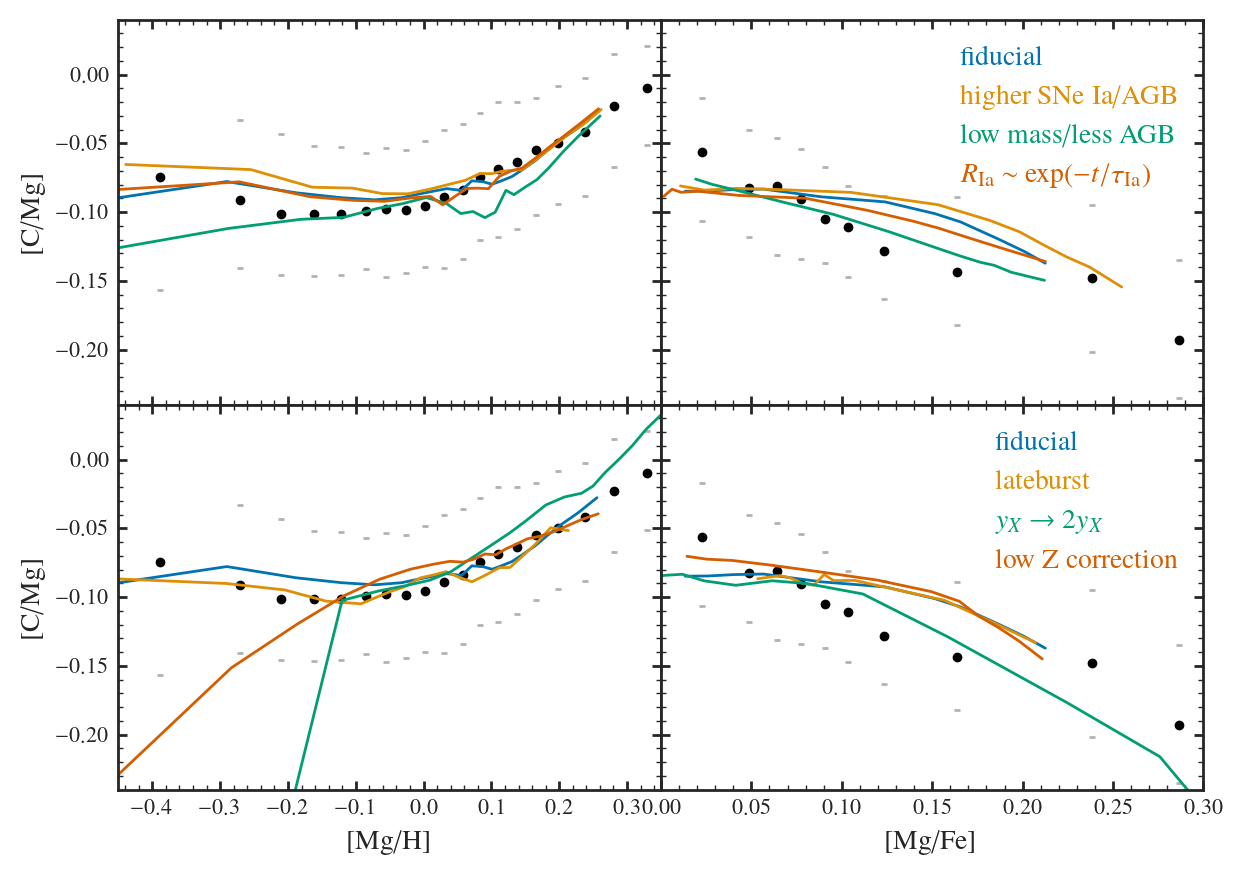

In [42]:
fig, axs = plt.subplots(2, 2, figsize=(7, 5), sharex="col", sharey="row", gridspec_kw={"wspace": 0, "hspace": 0})


names = [
    "C11_f0.2",
    "C11_f0.3_fe_ia1.2",
    "C11_f0.1_m_factor1.5",
    "C11_f0.2_RIaexp"

        ]

labels=["fiducial", r"higher SNe Ia/AGB", r"low mass/less AGB", r"$R_{\rm Ia} \sim \exp(-t/\tau_{\rm Ia})$"]
compare(names, labels, axs = axs[0])


names = [
    "C11_f0.2",
    "C11_f0.2_lateburst",
    "C11_f0.2_eta2.0",
    "C11_f0.2_BiLogLin",

        ]

labels=["fiducial", "lateburst", r"$y_X\rightarrow 2y_X$","low Z correction"]

compare(names, labels, axs = axs[1])


plt.savefig("figures/sims_degens.pdf")

Text(0, 0.5, '[Mg/Fe]')

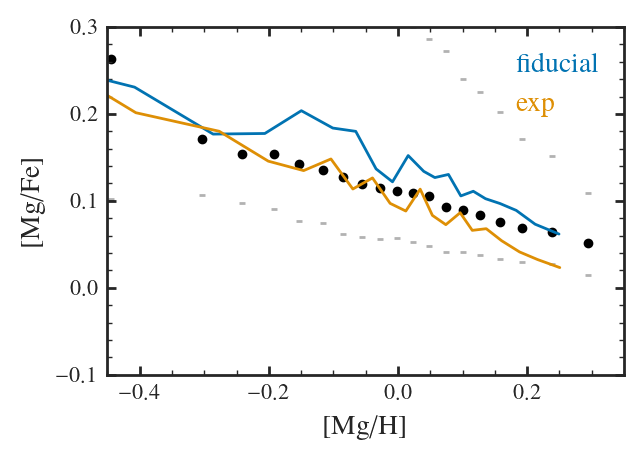

In [14]:
names = ["C11_f0.2",
        "C11_f0.2_RIaexp"]
labels = ["fiducial", "exp"]

compare_cooh(names, labels, y="MG_FE", ylim=(-0.1, 0.3), filt_ha=False)
plt.ylabel("[Mg/Fe]")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


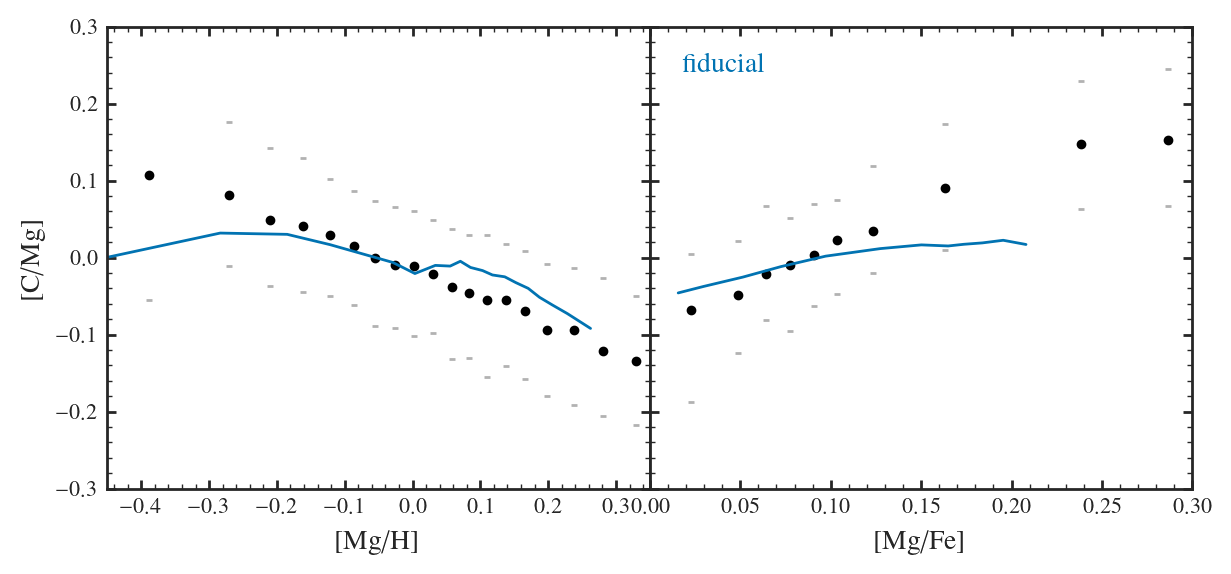

In [17]:
names = ["C11_f0.2"]
labels = ["fiducial"]
compare(names, labels, y="C_N", ylim=(-0.3, 0.3))
plt.savefig("figures/c_n.pdf")

# Other AGB yield models?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


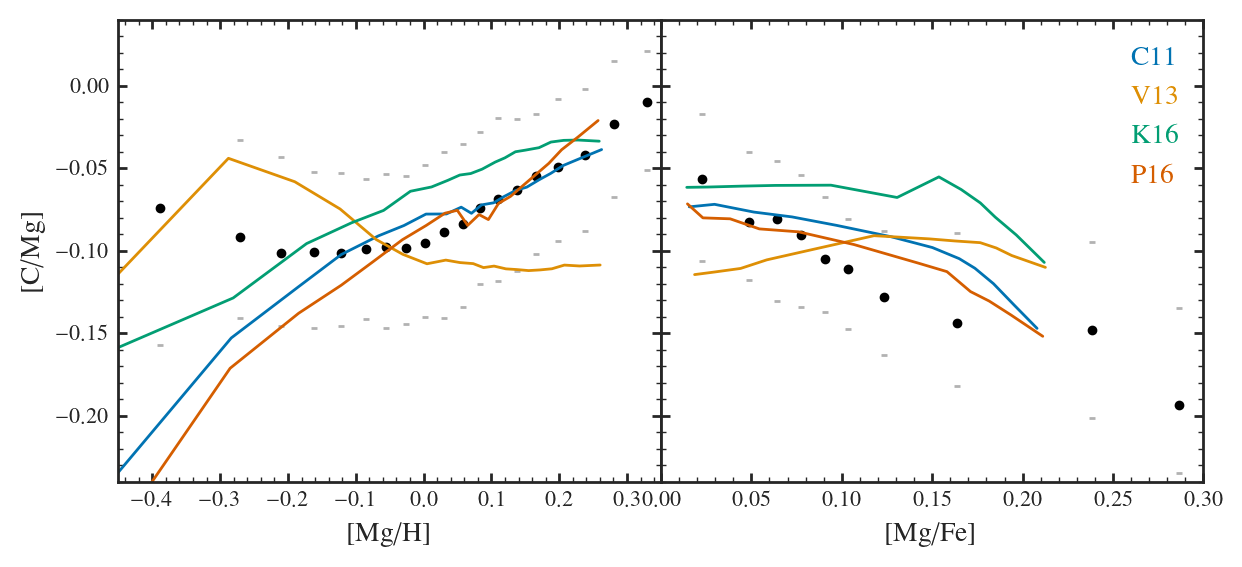

In [29]:
names = [    
    "C11_f0.2",
    "V13_f0.2",
    "K16_f0.2",
    "P16_f0.2",
  ]

labels = ["C11", "V13", "K16",  "P16"]

compare(names, labels)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


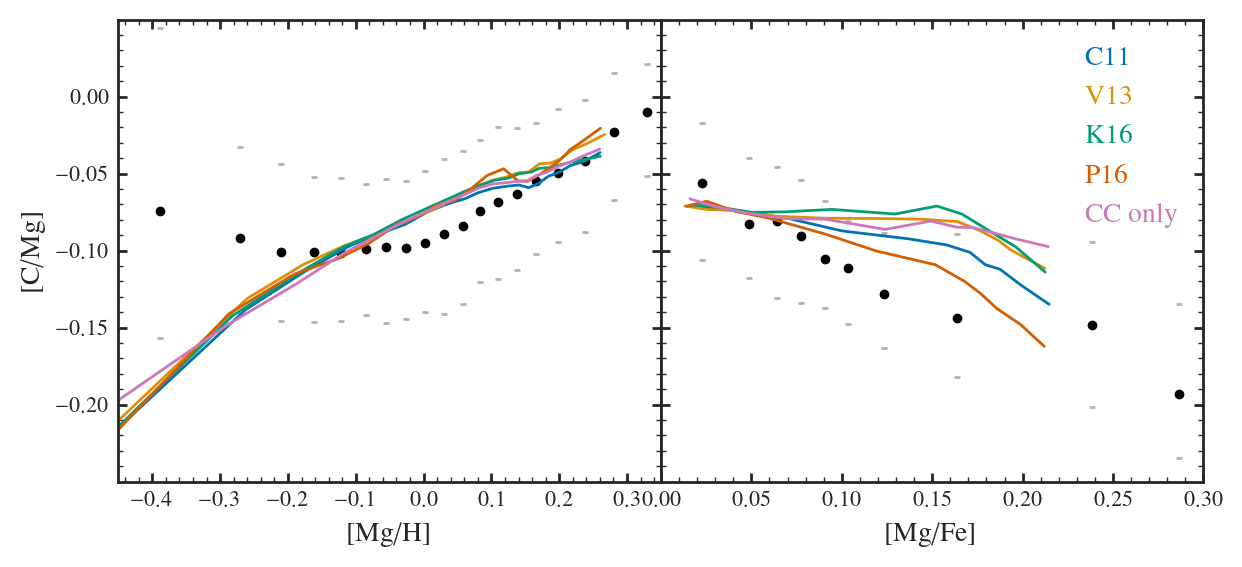

In [28]:
names = [    
    "C11_oob",
    "V13_oob",
    "K16_oob",
    "P16_oob",
    "C11_f0.0"
  ]

labels = ["C11", "V13", "K16",  "P16", "CC only"]

compare(names, labels)
plt.ylim(-0.25, 0.05)
plt.savefig("figures/sims_agb.pdf")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


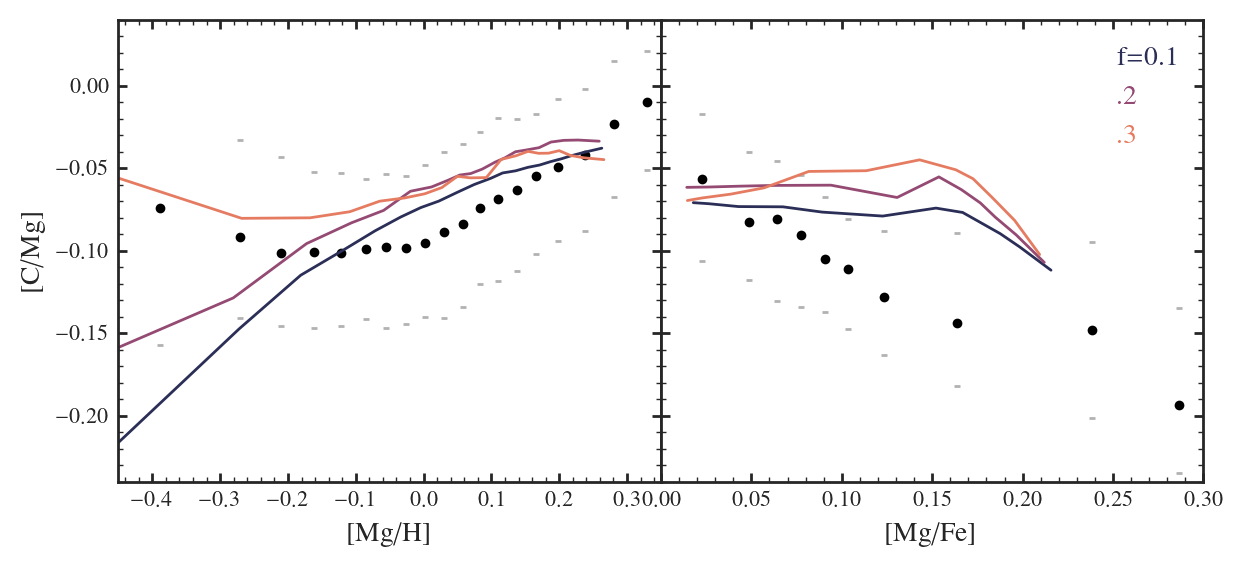

In [27]:
names = [
    "K16_f0.1",
    "K16_f0.2",
    "K16_f0.3"
]
labels = ["f=0.1", ".2", ".3"]
compare(names, labels, sequential=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


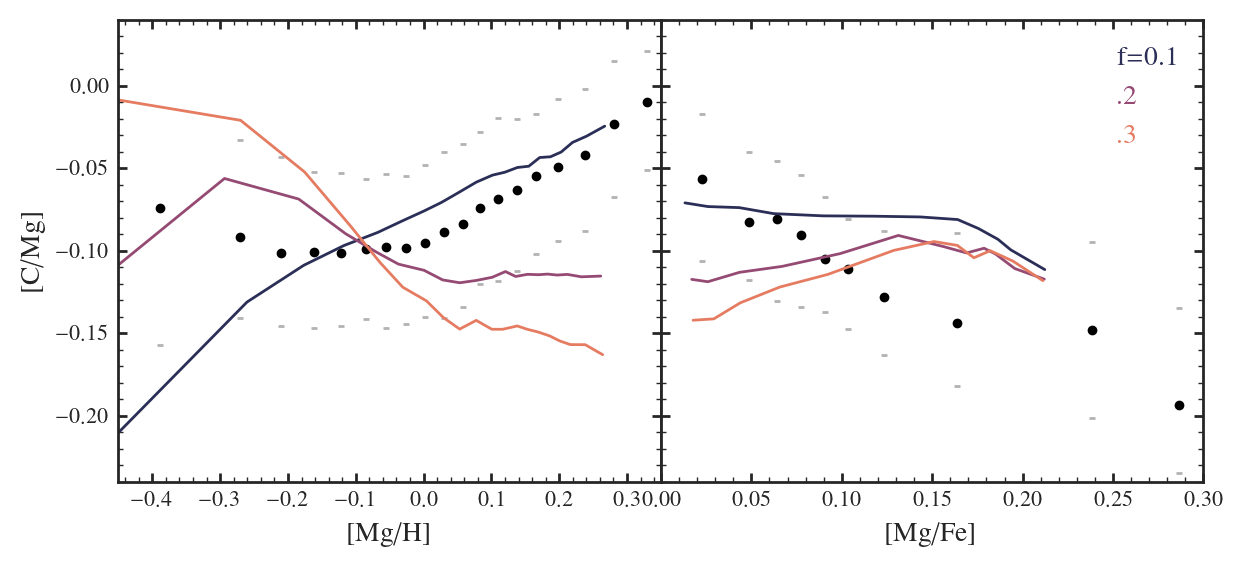

In [70]:
names = [
    "V13_oob",
    "V13_alpha_agb2.0",
    "V13_alpha_agb3.0"
]
labels = ["f=0.1", ".2", ".3"]
compare(names, labels, sequential=True)

V13 predicts declining yields with metallicity with higher ratios. This is a combination of the steep metallicity dependence and the tendency of the yields to become negative after solar metallicity.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


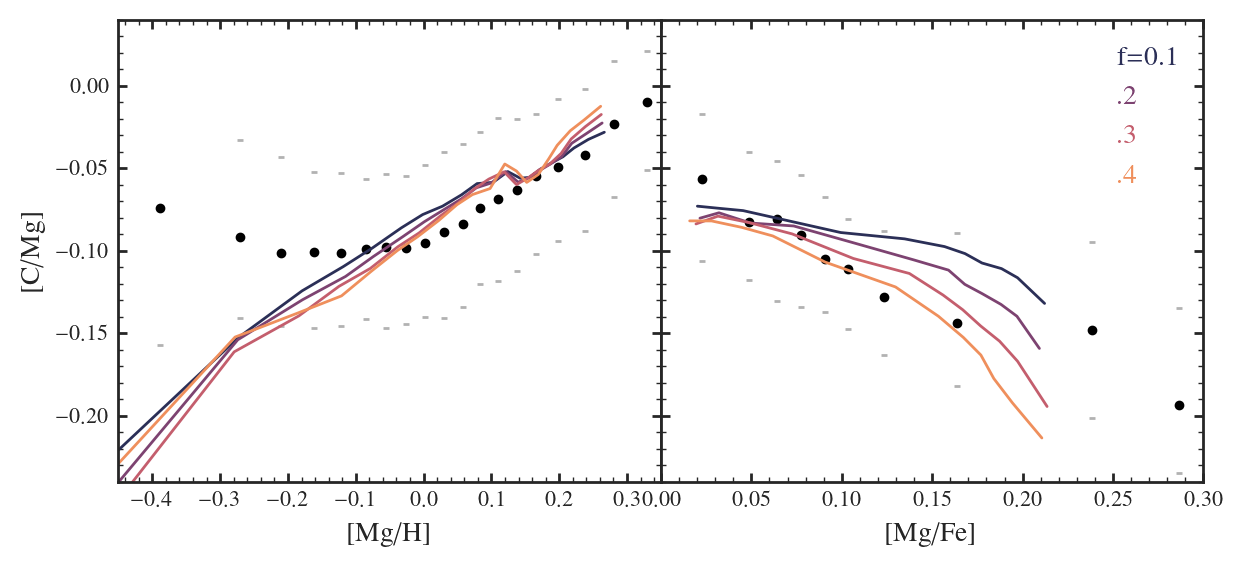

In [71]:
names = [
    "P16_f0.1",
    "P16_f0.2",
    "P16_f0.3",
    "P16_f0.4"
]
labels = ["f=0.1", ".2", ".3", ".4"]
compare(names, labels, sequential=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


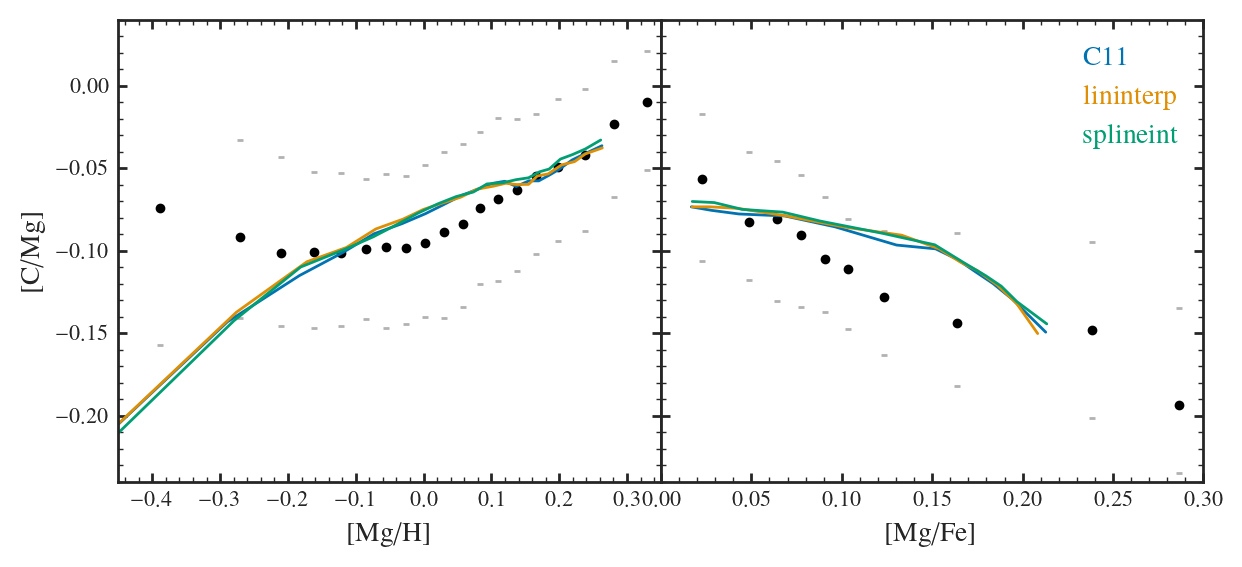

In [10]:
names = [    
    "C11_f0.2",
    "C11_f0.2_lininterp",
    "C11_f0.2_splineint"
  ]

labels = ["C11", "lininterp", "splineint"]

compare(names, labels)


# Other CCSNe Models?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


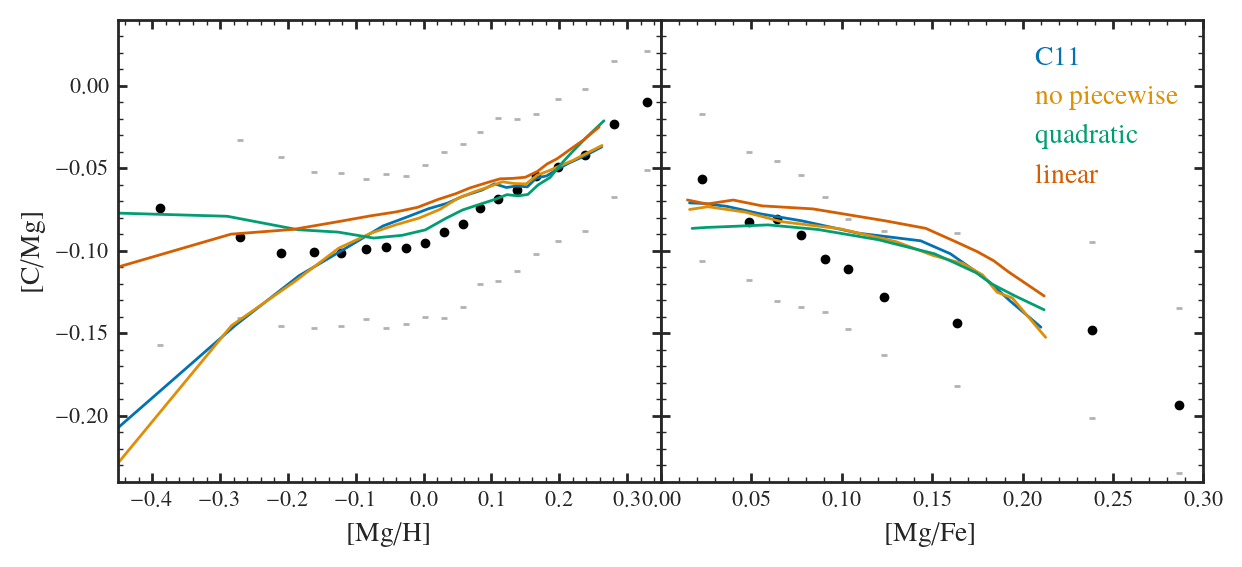

In [ ]:
names = [    
    "C11_f0.2",
    "C11_f0.2_LogLin",
    "C11_f0.2_Quadratic",
    "C11_f0.2_Lin"
  ]

labels = ["C11", "no piecewise ", "quadratic", "linear"]

compare(names, labels)

The yield models show

In [20]:
def plot_ycc_model(name, **kwargs):
    m_h = np.linspace(-2, 0.8, 1000)
    Z = gcem.MH_to_Z(m_h)
    
    surp.yields.set_yields(surp.YieldParams.from_file(f"../models/{name}/yield_params.json"), verbose=False)

    y_c_cc = vice.yields.ccsne.settings["c"]
    y_mg = vice.yields.ccsne.settings["mg"]

    y = [y_c_cc(z) for z in Z]
    plt.plot(m_h, y, **kwargs)

In [21]:
surp.yields.set_yields(surp.YieldParams.from_file(f"../models/C11_f0.2_Lin/yield_params.json"))

yields set to Magg et al. 2022 abundances
Yield settings
X        Z_solar    CC                             agb                            SN Ia                          

c        3.39e-03   2.30e-03 + 4.41e-02 (Z - Z0)   1.44 × cristallo11             0                              

n        1.04e-03   5.00e-04                       5.02e-04 M Z/Z0                0                              

o        7.33e-03   7.13e-03                       0                              0                              

mg       6.71e-04   6.52e-04                       0                              0                              

fe       1.37e-03   4.73e-04                       0                              7.70e-04                       





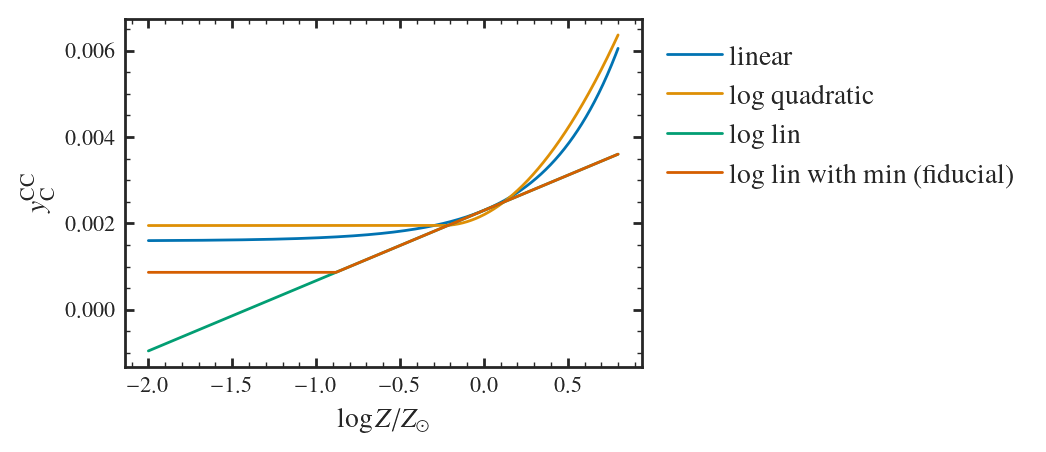

In [25]:
plot_ycc_model("C11_f0.2_Lin", label="linear")
plot_ycc_model("C11_f0.2_Quadratic", label="log quadratic")
plot_ycc_model("C11_f0.2_LogLin", label="log lin")
plot_ycc_model("C11_f0.2", label="log lin with min (fiducial)")

plt.xlabel(r"$\log Z / Z_\odot$")
plt.ylabel(r"$y_{\rm C}^{\rm CC}$")
arya.Legend(-1)

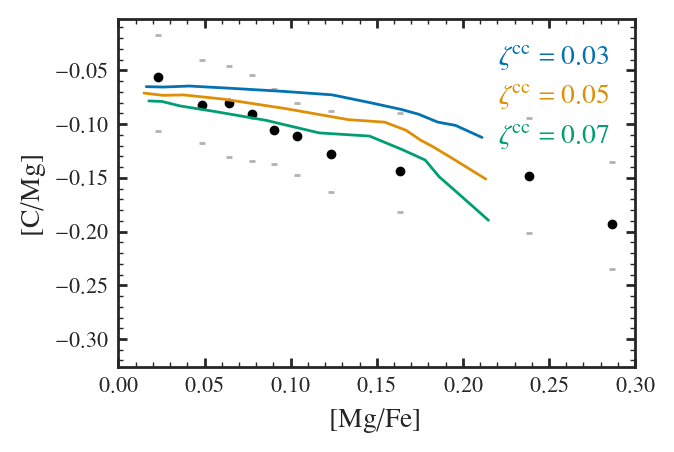

In [11]:
names = [
    "C11_f0.2_zeta0.0008",
    "C11_f0.2_zeta0.0016",
    "C11_f0.2_zeta0.0024",
]
labels = [
    r"$\zeta^{\rm cc}=0.03$", 
    r"$\zeta^{\rm cc}=0.05$", 
    r"$\zeta^{\rm cc}=0.07$"
]

compare_coofe(names, labels)

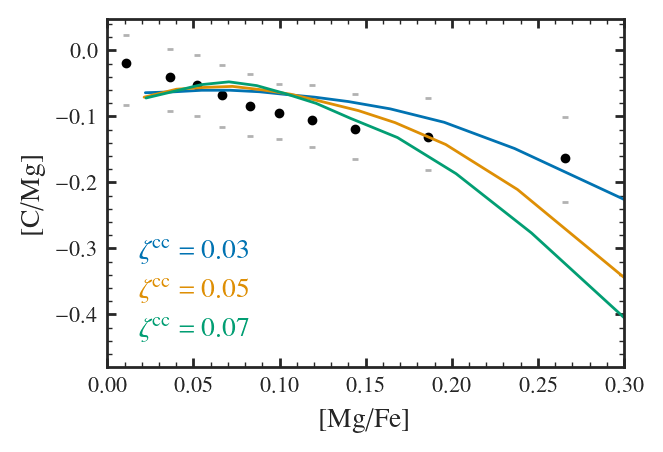

In [66]:
compare_coofe(names, labels, w=10)

# Analytic models

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


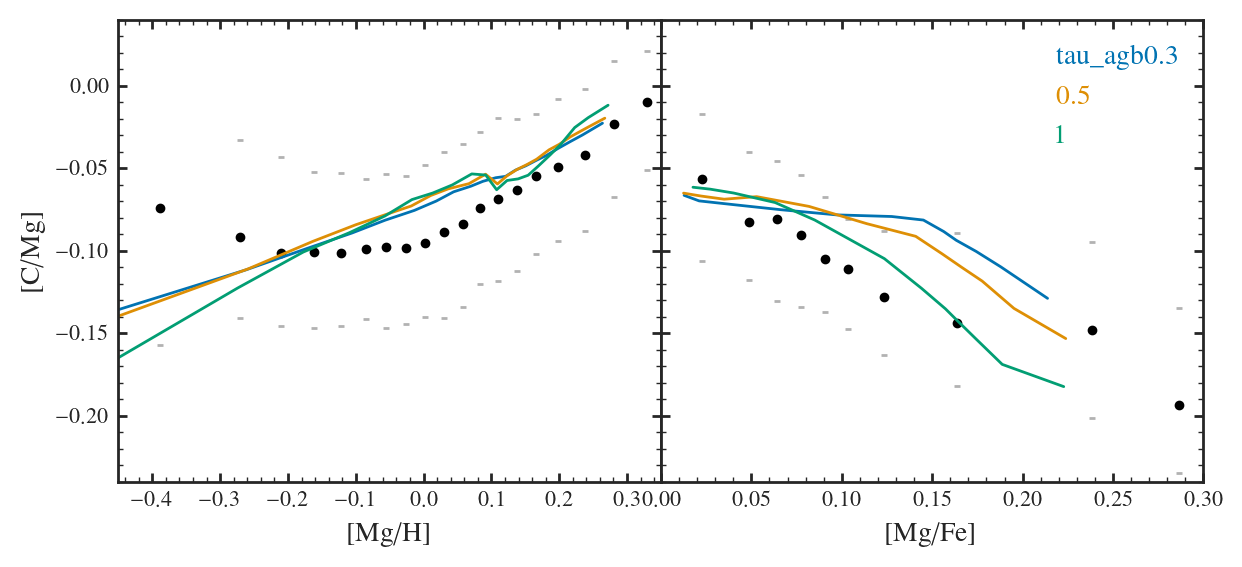

In [26]:
names = [
    "A_f0.2_zeta_agb-0.02_t_d0.15_tau_agb0.3/",
    "A_f0.2_zeta_agb-0.02_t_d0.15_tau_agb0.5/",
    "A_f0.2_zeta_agb-0.02_t_d0.15_tau_agb1.0/",

]

labels = ["tau_agb0.3", "0.5", "1"]
compare(names, labels)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


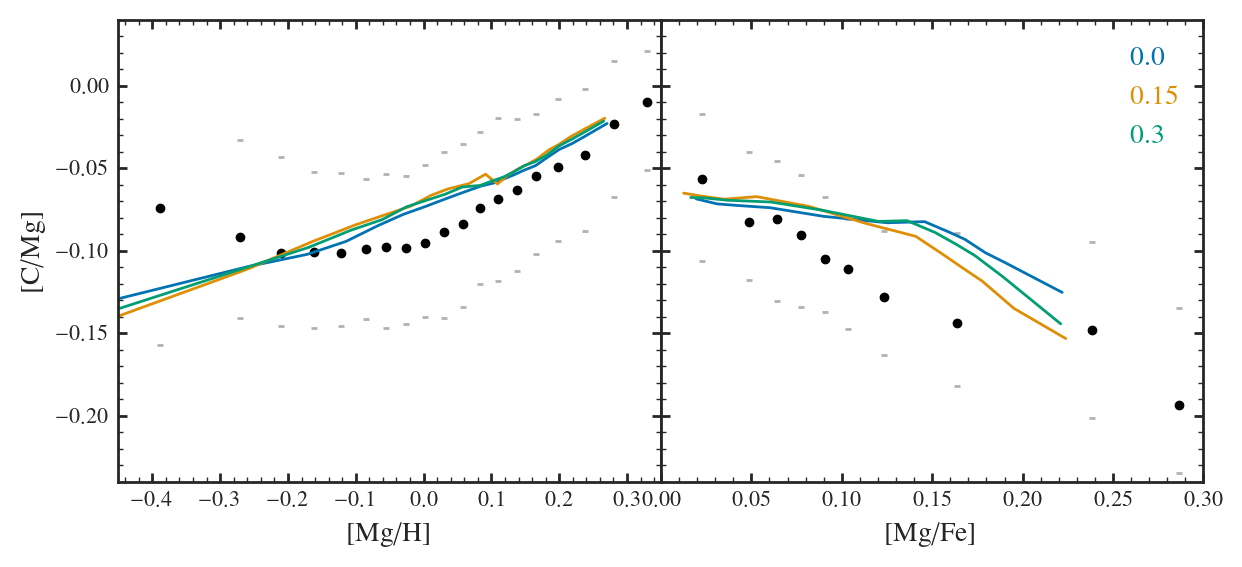

In [27]:
names = [
    "A_f0.2_zeta_agb-0.02_t_d0.0_tau_agb0.3/",
    "A_f0.2_zeta_agb-0.02_t_d0.15_tau_agb0.5/",
    "A_f0.2_zeta_agb-0.02_t_d0.3_tau_agb0.3/",
]

labels = ["0.0", "0.15", "0.3"]
compare(names, labels)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


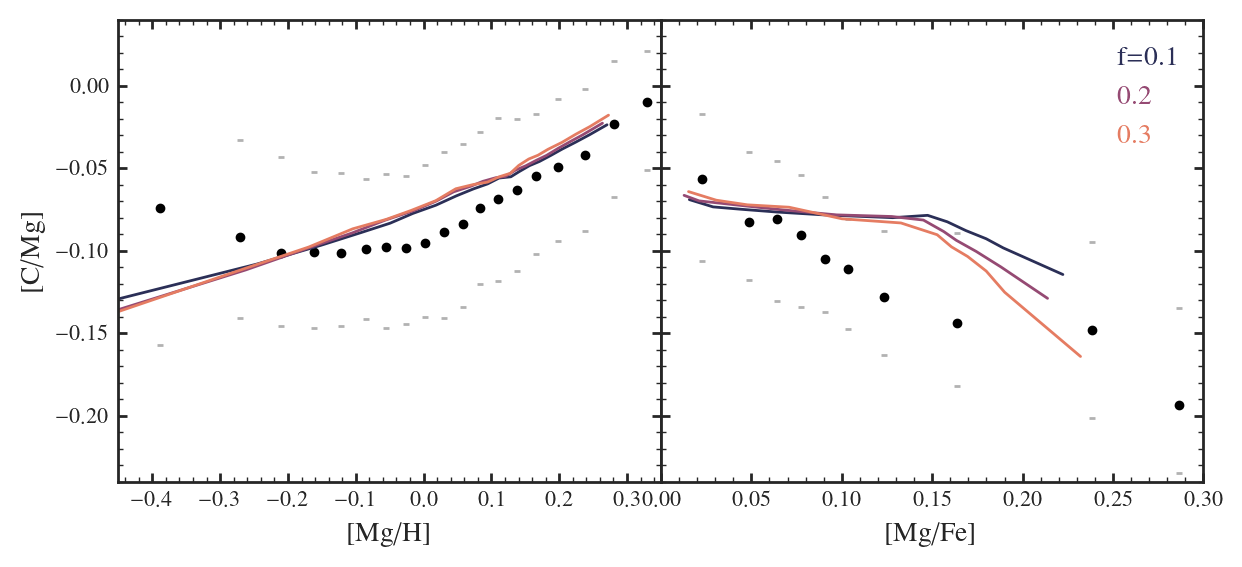

In [28]:
names = [
    "A_f0.1_zeta_agb-0.02_t_d0.15_tau_agb0.3/",
    "A_f0.2_zeta_agb-0.02_t_d0.15_tau_agb0.3/",
    "A_f0.3_zeta_agb-0.02_t_d0.15_tau_agb0.3/",

]

labels = ["f=0.1", "0.2", "0.3"]
compare(names, labels, sequential=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


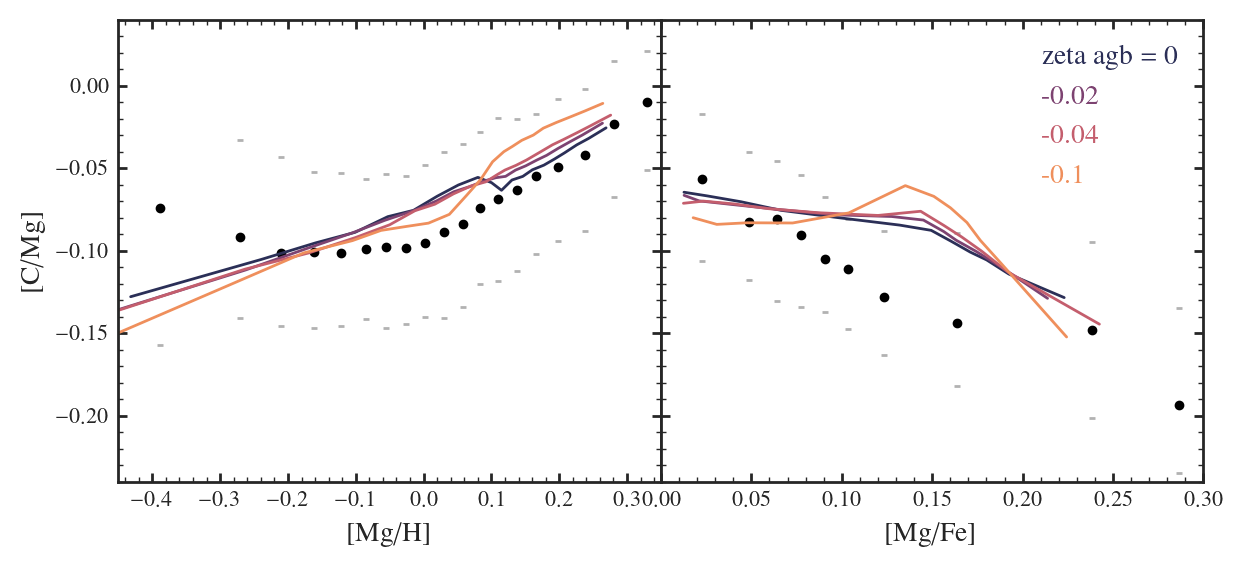

In [29]:
names = [    
    "A_f0.2_zeta_agb0.0_t_d0.15_tau_agb0.3",
    "A_f0.2_zeta_agb-0.02_t_d0.15_tau_agb0.3",
    "A_f0.2_zeta_agb-0.04_t_d0.15_tau_agb0.3",
    "A_f0.2_zeta_agb-0.1_t_d0.15_tau_agb0.3",
]

labels = ["zeta agb = 0", "-0.02", "-0.04", "-0.1"]
compare(names, labels, sequential=True)

# Other GCE Params

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


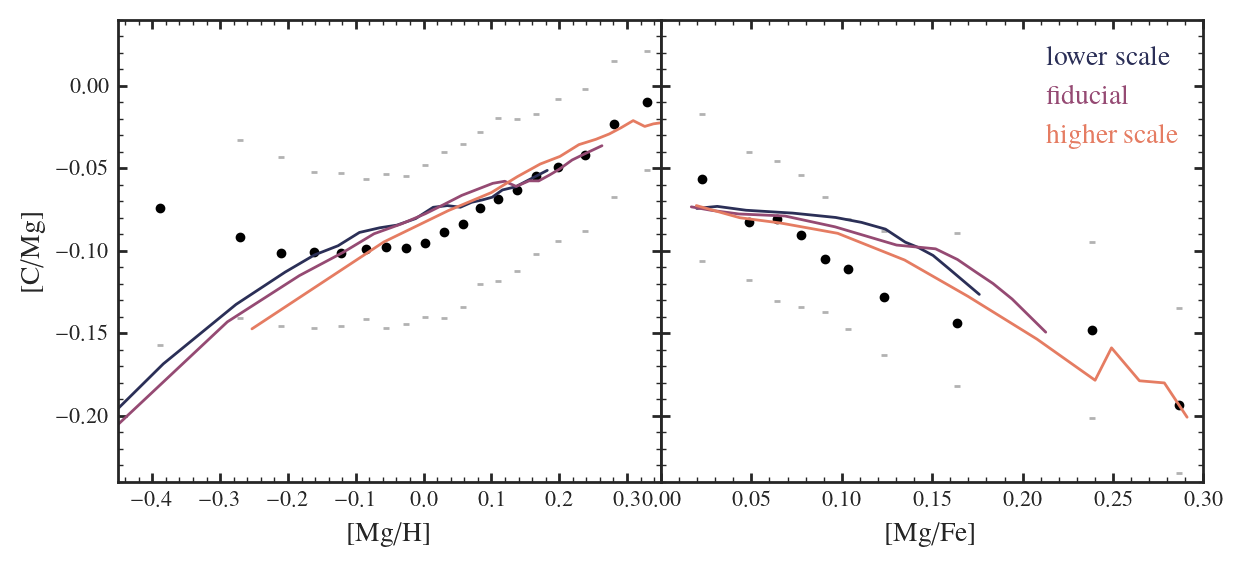

In [19]:
names = [
    "C11_f0.2_y0.8",
    "C11_f0.2",
    "C11_f0.2_y1.5",
]
labels = [
    r"lower scale",  
    r"fiducial", 
    r"higher scale"
]

compare(names, labels, sequential=True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


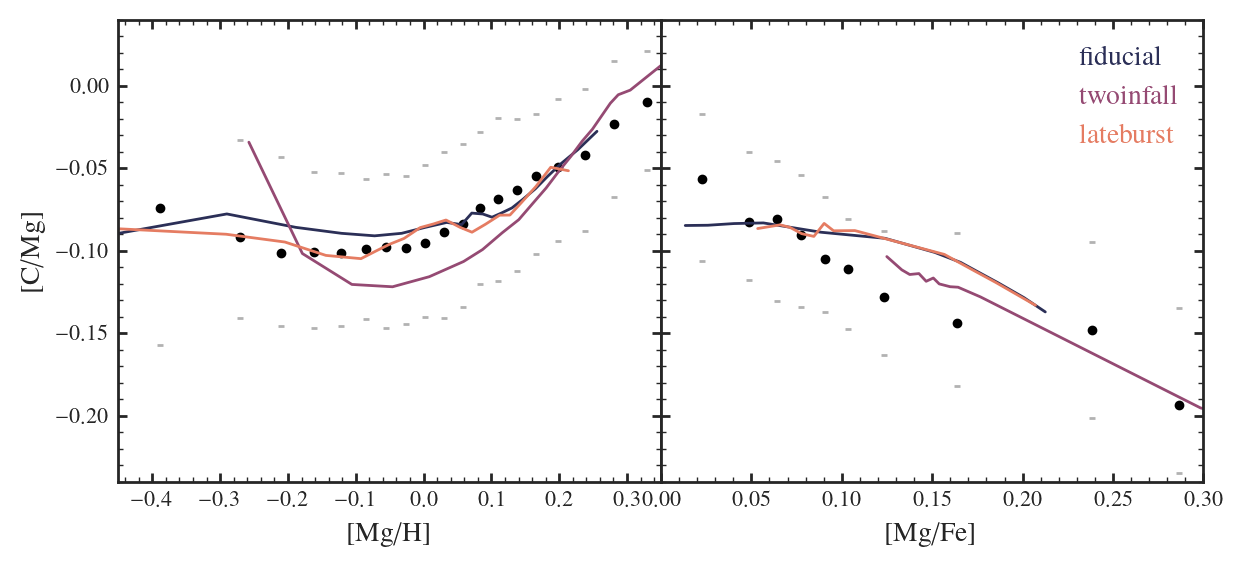

In [44]:
names = [
    "C11_f0.2",
    "C11_f0.2_twoinfall/",
    "C11_f0.2_lateburst/",
]
labels = [
    r"fiducial",  
    r"twoinfall",
    r"lateburst"
]

compare(names, labels, sequential=True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


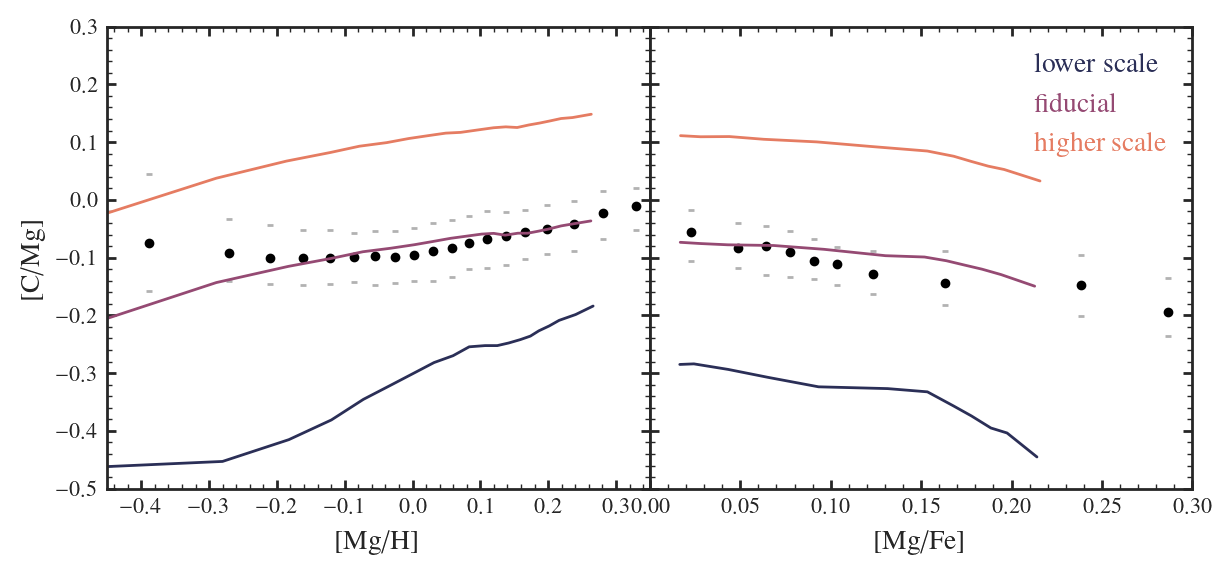

In [15]:
names = [
    "C11_f0.2_yc0.6",
    "C11_f0.2",
    "C11_f0.2_yc1.5",
]
labels = [
    r"lower scale",  
    r"fiducial", 
    r"higher scale"
]

compare(names, labels, sequential=True, ylim=(-0.5, 0.3))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


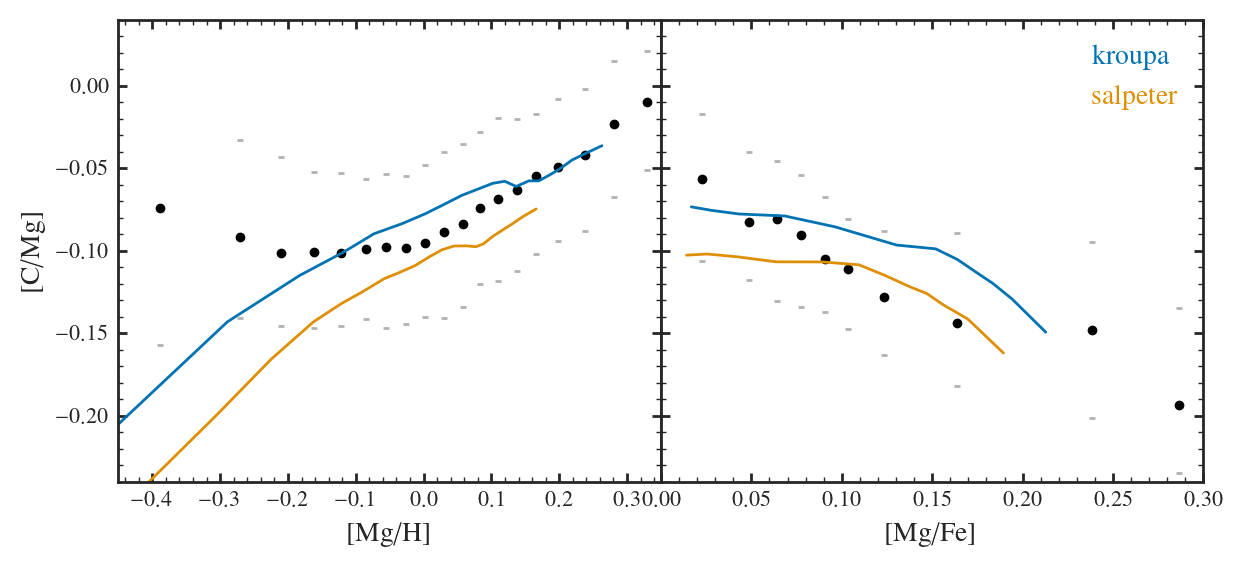

In [16]:
names = [
    "C11_f0.2",
    "C11_f0.2_salpeter",
]
labels = [
    r"kroupa",  
    r"salpeter", 
]

compare(names, labels, sequential=False)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


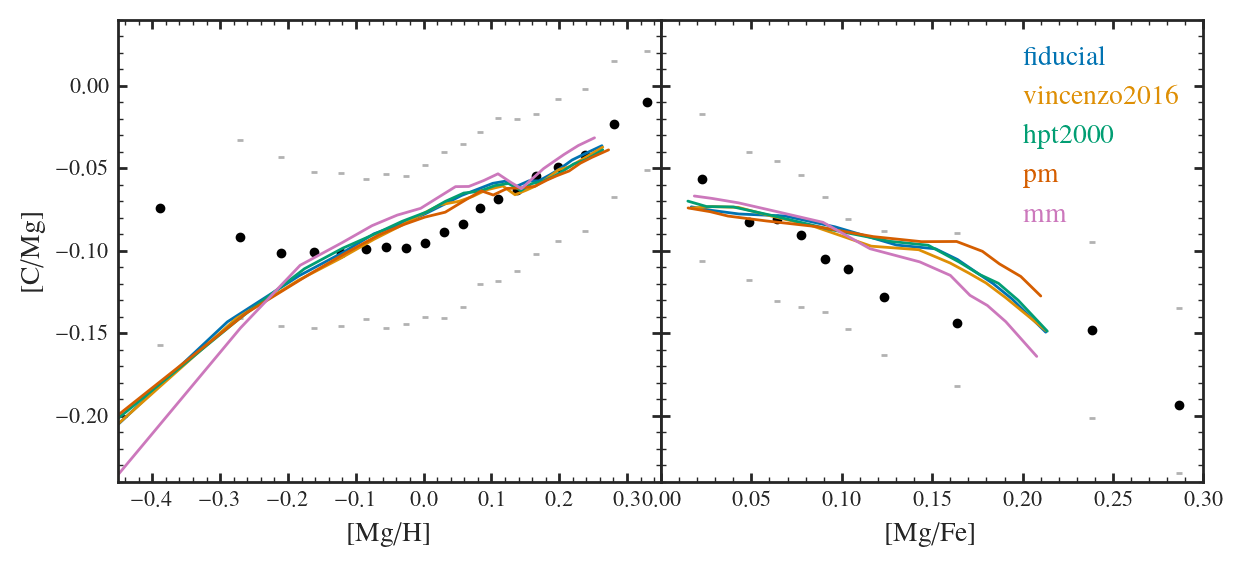

In [27]:
names = [
    "C11_f0.2",
    "C11_f0.2_mlrvincenzo2016",
    "C11_f0.2_mlrka1997",
    "C11_f0.2_mlrpm1993",
    "C11_f0.2_mlrmm1989"
]
labels = [
    r"fiducial",  
    r"vincenzo2016", 
    r"hpt2000",
    r"pm",
    "mm"
]

compare(names, labels, sequential=False)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


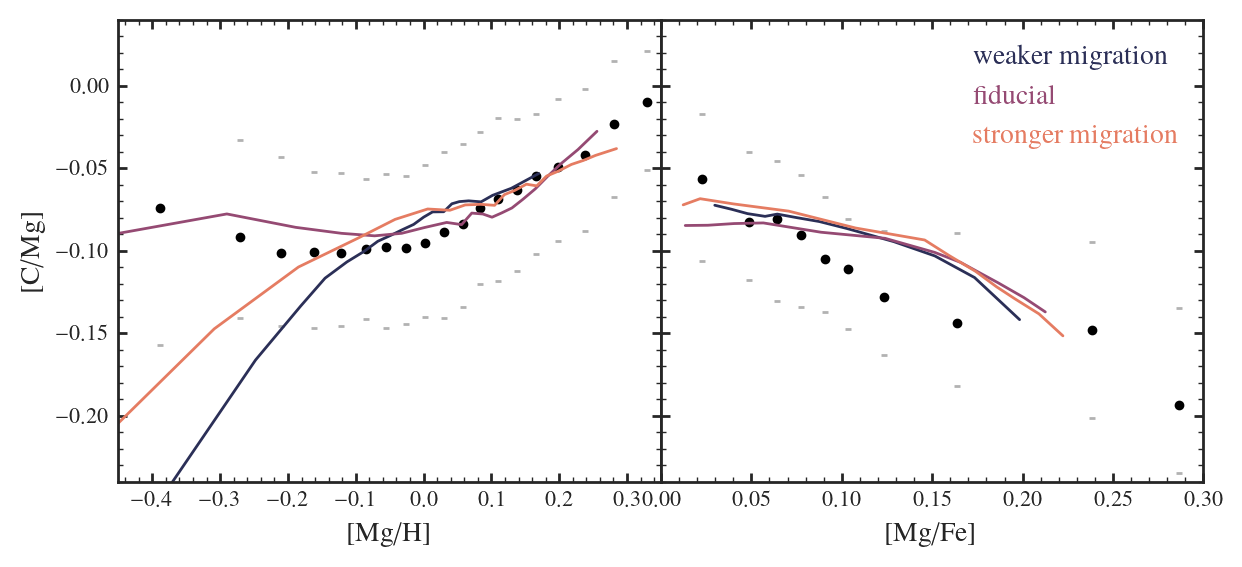

In [45]:
names = [
    "C11_f0.2_sigma_R0.5",
    "C11_f0.2",
    "C11_f0.2_sigma_R2.0",
]
labels = [
    r"weaker migration",  
    r"fiducial", 
    r"stronger migration"
]

compare(names, labels, sequential=True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


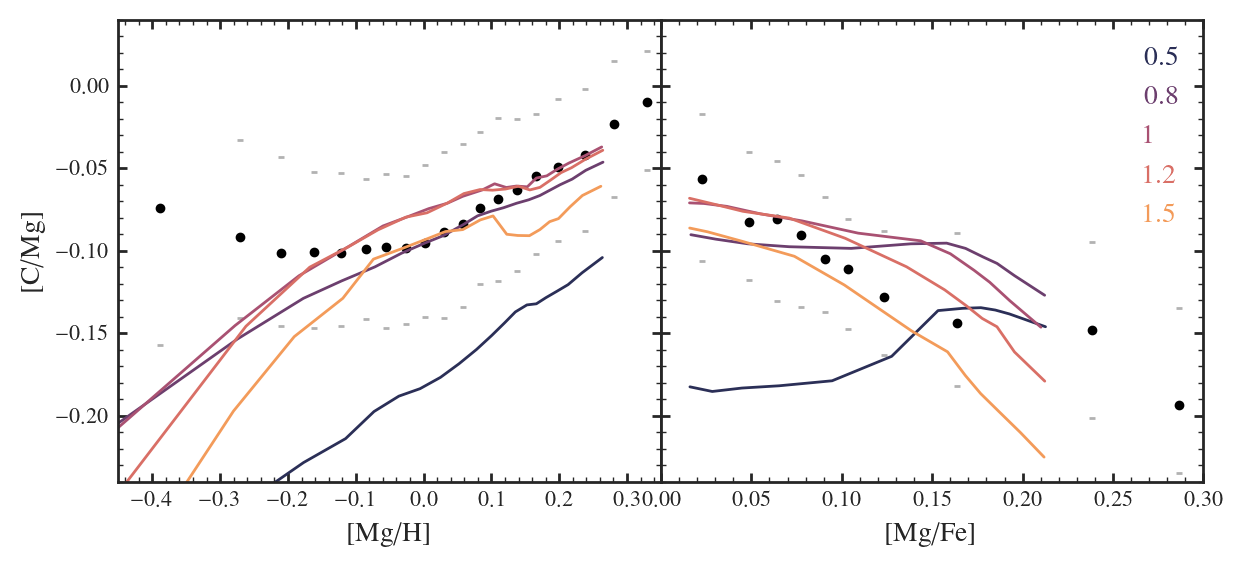

In [72]:
names = [
    "C11_f0.2_m_factor0.5",
    "C11_f0.2_m_factor0.8",
    "C11_f0.2",
    "C11_f0.2_m_factor1.2",
    "C11_f0.2_m_factor1.5",
]
labels = [
    "0.5",
    "0.8",
    "1",
    "1.2",
    "1.5"
]

compare(names, labels, sequential=True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


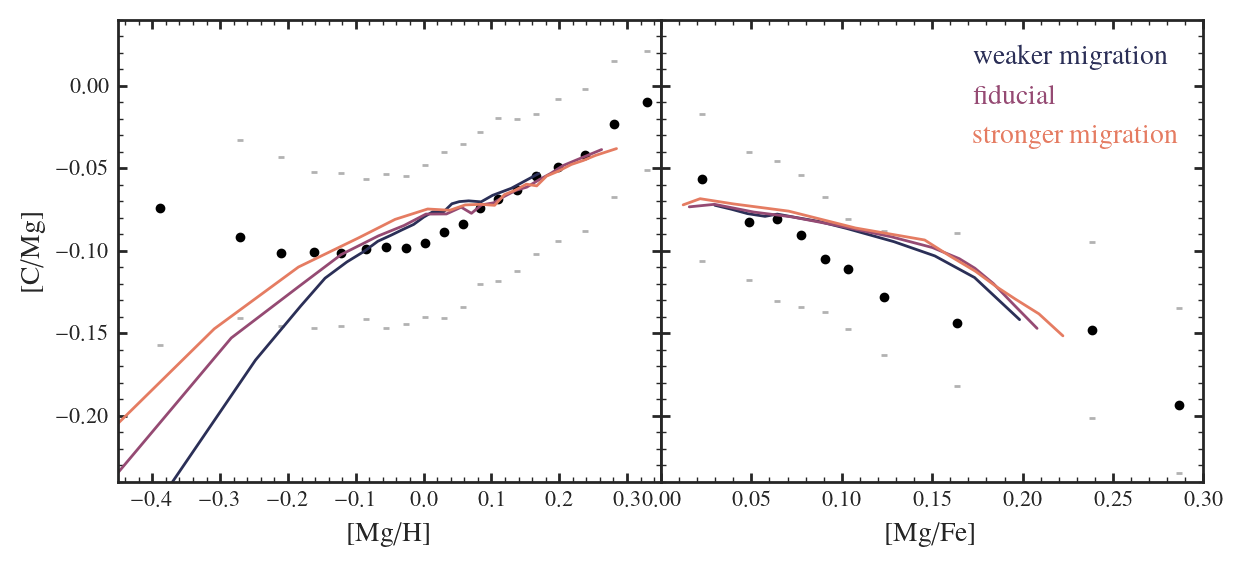

In [12]:
names = [
    "C11_f0.2_sigma_R0.5",
    "C11_f0.2",
    "C11_f0.2_sigma_R2.0",
]
labels = [
    r"weaker migration",  
    r"fiducial", 
    r"stronger migration"
]

compare(names, labels, sequential=True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


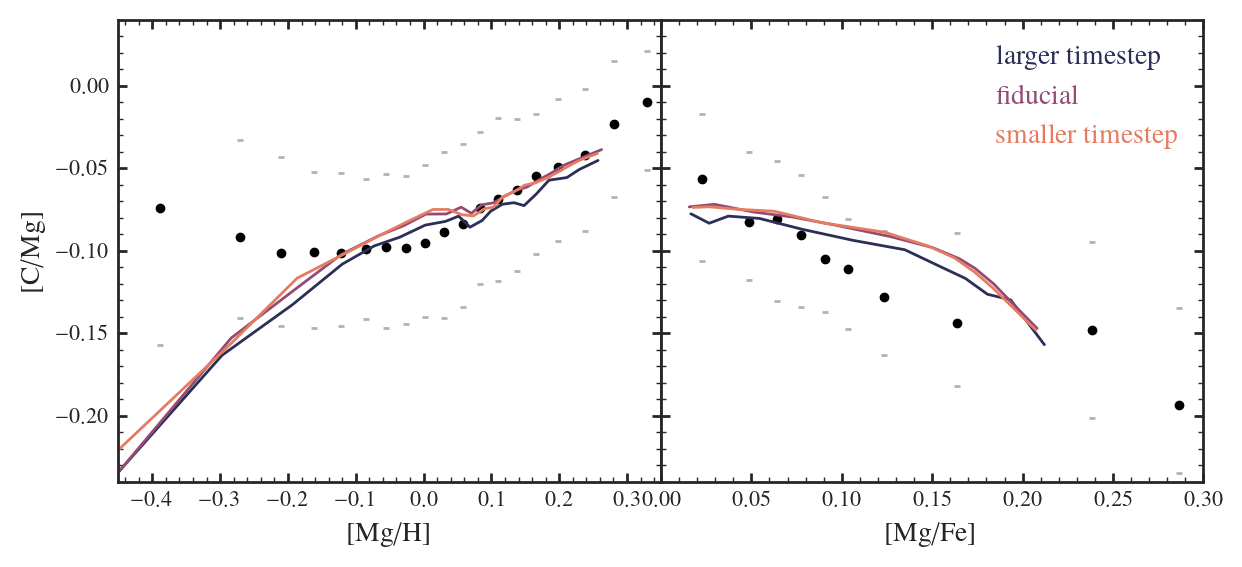

In [19]:
names = [
    "C11_f0.2_dt0.05",
    "C11_f0.2",
    "C11_f0.2_dt0.01",
]
labels = [
    r"larger timestep",  
    r"fiducial", 
    r"smaller timestep"
]

compare(names, labels, sequential=True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


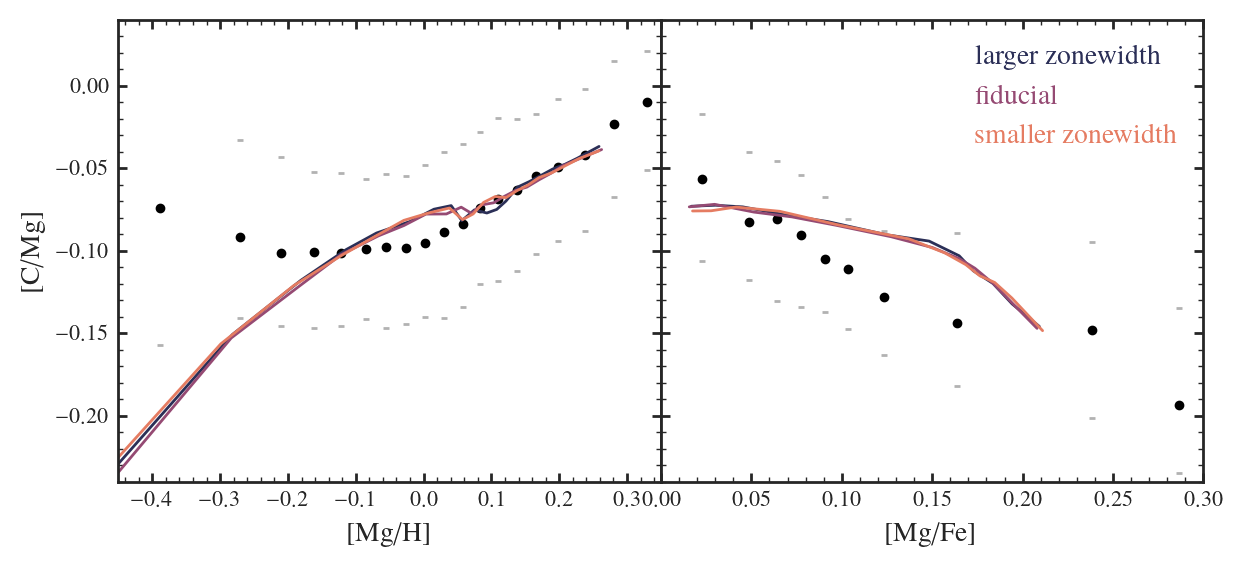

In [11]:
names = [
    "C11_f0.2_w0.2",
    "C11_f0.2",
    "C11_f0.2_w0.05",
]
labels = [
    r"larger zonewidth",  
    r"fiducial", 
    r"smaller zonewidth"
]

compare(names, labels, sequential=True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


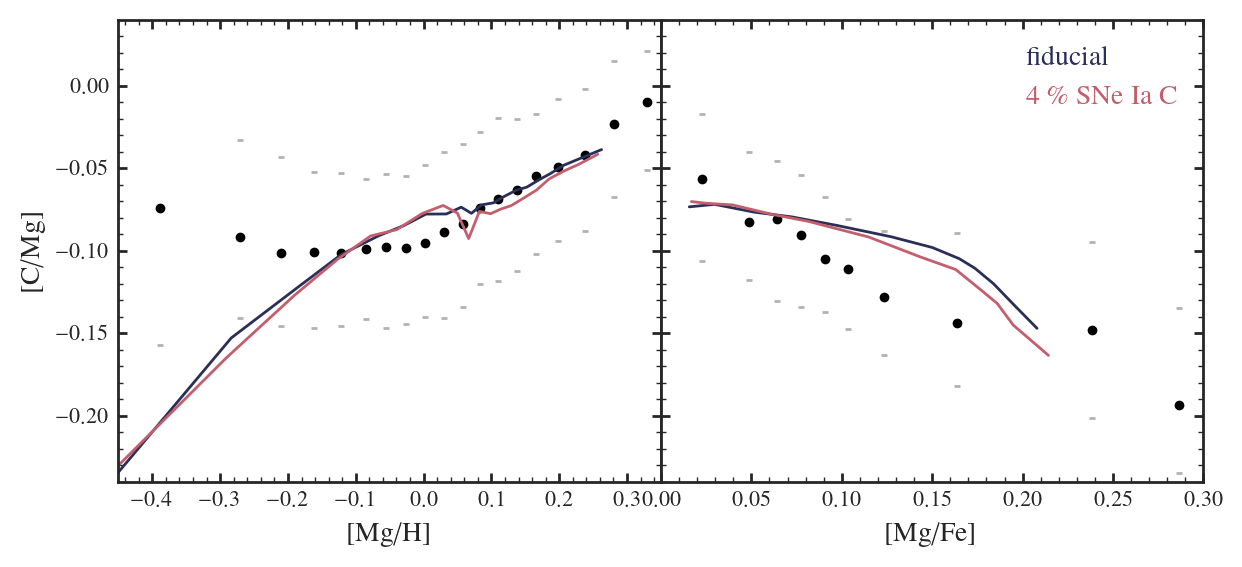

In [40]:
names = [
    "C11_f0.2",
    "C11_f0.2_iac",
]
labels = [
    r"fiducial", 
    r"4 \% SNe Ia C"
]

compare(names, labels, sequential=True)


In [ ]:
names = [
    "C11_f0.2_A0",
    "C11_f0.2_A0.5",
    "C11_f0.2",
    "C11_f0.2_A1.5",
]
labels = [
    "0", "0.5", "1", "1.5"
]

compare(names, labels, sequential=True)
